# Topic 1

## Task 0

INFO: Siden oppgaven vil vi skal holde samme måleenheter bruker jeg 1 Å = 0,1 nm = 1e-10 m

Simulation box (nm)
Unit: 1 Å = 0.1 nm

Padding box (nm):
 x: [-5.018, -2.877]   size = 2.141 nm
 y: [-1.980, 0.457]   size = 2.438 nm
 z: [-1.199, 1.190]   size = 2.389 nm

Senter (nm): (-3.948, -0.761, -0.005)
Å x: [-50.181, -28.773]  size = 21.408 Å (pad=2.000 Å)
Å y: [-19.802, 4.573]  size = 24.376 Å (pad=2.031 Å)
Å z: [-11.992, 11.897]  size = 23.889 Å (pad=2.000 Å)


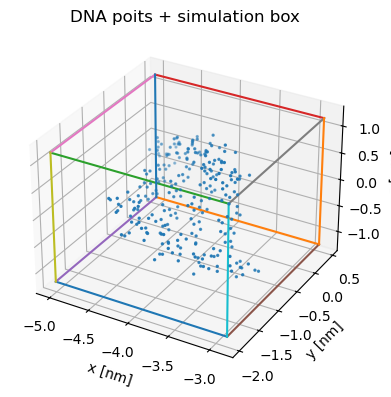

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from functions import random_point_in_box
from mpl_toolkits.mplot3d import Axes3D
"""
Define the simulation box (x, y, z) in 3D and choose units
Read the file dna_coords.txt (format: SYM x y z in Ångstrøm)
Create a 3D box around the DNA with a small padding equal 
to the larger of 10% of the molecule’s size or 2 Å on each side
Convert all values to nanometers (nm) and print the final box dimensions.
Unit: 1 Å = 0.1 nm
"""

angstrom_to_nm = 0.1

path = "dna_coords.txt"  
points_angstrom = np.loadtxt(path, usecols=(1,2,3))  # (N,3)

# Min, max, span pr aksis (Å) 
min_angstrom = points_angstrom.min(axis=0)
max_angstrom = points_angstrom.max(axis=0)
span_angstrom = max_angstrom - min_angstrom

# Padding per aksis (Å): 10% of span, atleast 2 Å 
padding_angstrom = np.maximum(span_angstrom * 0.10, 2.0)

# Boxlimit in Å
box_min_angstrom = min_angstrom - padding_angstrom
box_max_angstrom = max_angstrom + padding_angstrom

# Konverting boxlimit to nm ---
box_min_nm = box_min_angstrom * angstrom_to_nm
box_max_nm = box_max_angstrom * angstrom_to_nm
size_nm = box_max_nm - box_min_nm
center_nm = (box_min_nm + box_max_nm) / 2

# Print (bruker tre desimaler i alle oppgaver)!!!
def f(x):
    return f"{x:.3f}"

axes = ["x", "y", "z"]


print("Simulation box (nm)")
print("Unit: 1 Å = 0.1 nm\n")

print("Padding box (nm):")
for i, a in enumerate(axes):
    print(f" {a}: [{f(box_min_nm[i])}, {f(box_max_nm[i])}]   size = {f(size_nm[i])} nm")

print(f"\nSenter (nm): ({f(center_nm[0])}, {f(center_nm[1])}, {f(center_nm[2])})")

#(Do we need to se the numbers in Å?) 
for i, a in enumerate(axes):
     size_A = box_max_angstrom[i] - box_min_angstrom[i]
     print(f"Å {a}: [{f(box_min_angstrom[i])}, {f(box_max_angstrom[i])}]  size = {f(size_A)} Å (pad={f(padding_angstrom[i])} Å)")


points_nm = points_angstrom * angstrom_to_nm

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points_nm[:,0], points_nm[:,1], points_nm[:,2], s=2)

# tegn 12 kanter av boksen
xm0, xm1 = box_min_nm[0], box_max_nm[0]
ym0, ym1 = box_min_nm[1], box_max_nm[1]
zm0, zm1 = box_min_nm[2], box_max_nm[2]
edges = [
    ([xm0,xm1],[ym0,ym0],[zm0,zm0]),
    ([xm0,xm1],[ym1,ym1],[zm0,zm0]),
    ([xm0,xm1],[ym0,ym0],[zm1,zm1]),
    ([xm0,xm1],[ym1,ym1],[zm1,zm1]),
    ([xm0,xm0],[ym0,ym1],[zm0,zm0]),
    ([xm1,xm1],[ym0,ym1],[zm0,zm0]),
    ([xm0,xm0],[ym0,ym1],[zm1,zm1]),
    ([xm1,xm1],[ym0,ym1],[zm1,zm1]),
    ([xm0,xm0],[ym0,ym0],[zm0,zm1]),
    ([xm1,xm1],[ym0,ym0],[zm0,zm1]),
    ([xm0,xm0],[ym1,ym1],[zm0,zm1]),
    ([xm1,xm1],[ym1,ym1],[zm0,zm1]),
]
for X, Y, Z in edges:
    ax.plot(X, Y, Z)

ax.set_xlabel("x [nm]"); ax.set_ylabel("y [nm]"); ax.set_zlabel("z [nm]")
ax.set_title("DNA poits + simulation box")
plt.tight_layout(); plt.show()


In this task, we created a 3D simulation box that fully contains the DNA molecule.
The atomic coordinates in the file dna_coords.txt are given in Ångstrøm (Å), so following the book’s recommendations (Chapter 1), I converted everything to nanometers (nm), the standard unit used for molecular simulations (1 Å = 0.1 nm). To define the box, I first found the minimum and maximum coordinates of all atoms along x, y, and z. Then as suggested in the Monte Carlo chapter of the book (Chapter 8), I added a small margin (padding) around the molecule to ensure all points fit comfortably inside.


The padding was chosen as the larger of 10% of the box span or 2 Å.
This gives a slightly larger box that avoids edge effects but doesn’t waste too much empty space.
The final box dimensions were converted to nanometers and printed, along with the box center.
These values will be used in later Monte Carlo tasks for random sampling inside the box.

## Task 1

Random point (nm): [-5.00429557 -0.01630724 -0.11569705]


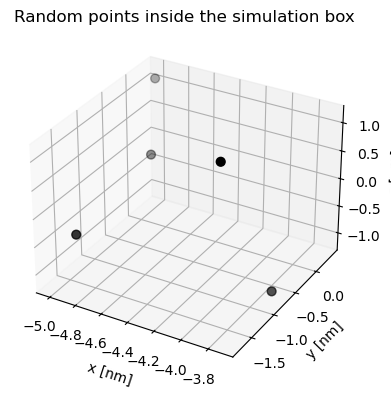

In [ ]:
# Random position a point

#from functions import random_point_in_box
# ---- Skal jeg ha med import her eller i starten??
p = random_point_in_box(box_min_nm, box_max_nm)

num_points = 5
points = []  

for i in range(num_points):
    point = random_point_in_box(box_min_nm, box_max_nm)
    points.append(point)

points = np.array(points)  

print("Random point (nm):", p)

""" 
Plot of the points in the simulation box
"""
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(points[:, 0], points[:, 1], points[:, 2], color="black", s=40)

ax.set_xlabel("x [nm]")
ax.set_ylabel("y [nm]")
ax.set_zlabel("z [nm]")
ax.set_title("Random points inside the simulation box")

plt.tight_layout()
plt.show()

We created a function random_point_in_box() that generates a random 3D point inside the simulation box.
The function uses NumPy’s random.uniform() to sample each coordinate between the box’s minimum and maximum values.
This ensures all points have equal probability of being selected within the defined volume.


VI KAN (I verified the distribution visually using a 3D scatter plot.)

## Task 2